In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [11]:
malldf=pd.read_csv('Mall_Customers.csv')
malldf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
malldf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

andrews curve used in categorical grouping

<Axes: >

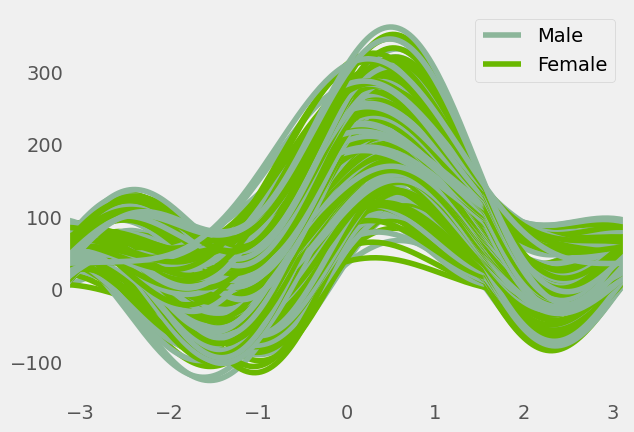

In [13]:
pd.plotting.andrews_curves(malldf,'Gender')

In [14]:
x=malldf.iloc[:,[3,4]].values


In [15]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[269981.28,
 182440.3076298702,
 132087.72428243398,
 73880.64496247195,
 66532.58264851091,
 37455.98455516028,
 31941.61295592704,
 30191.861815756554,
 22936.891549953318,
 21916.67157069983]

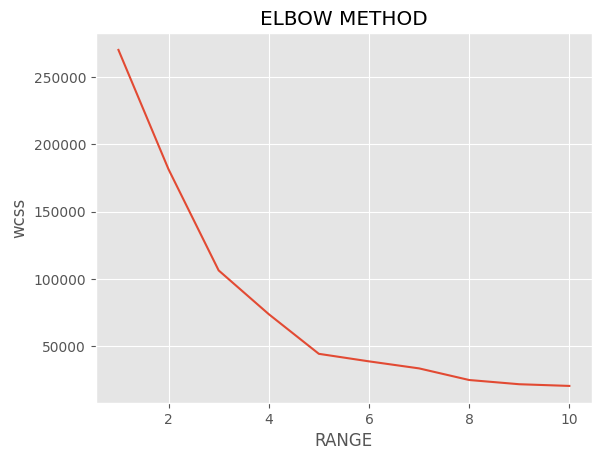

In [7]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('wcss')
plt.title('ELBOW METHOD')
plt.show()






In [16]:
km=KMeans(n_clusters=5)
ymeans=km.fit_predict(x)
ymeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

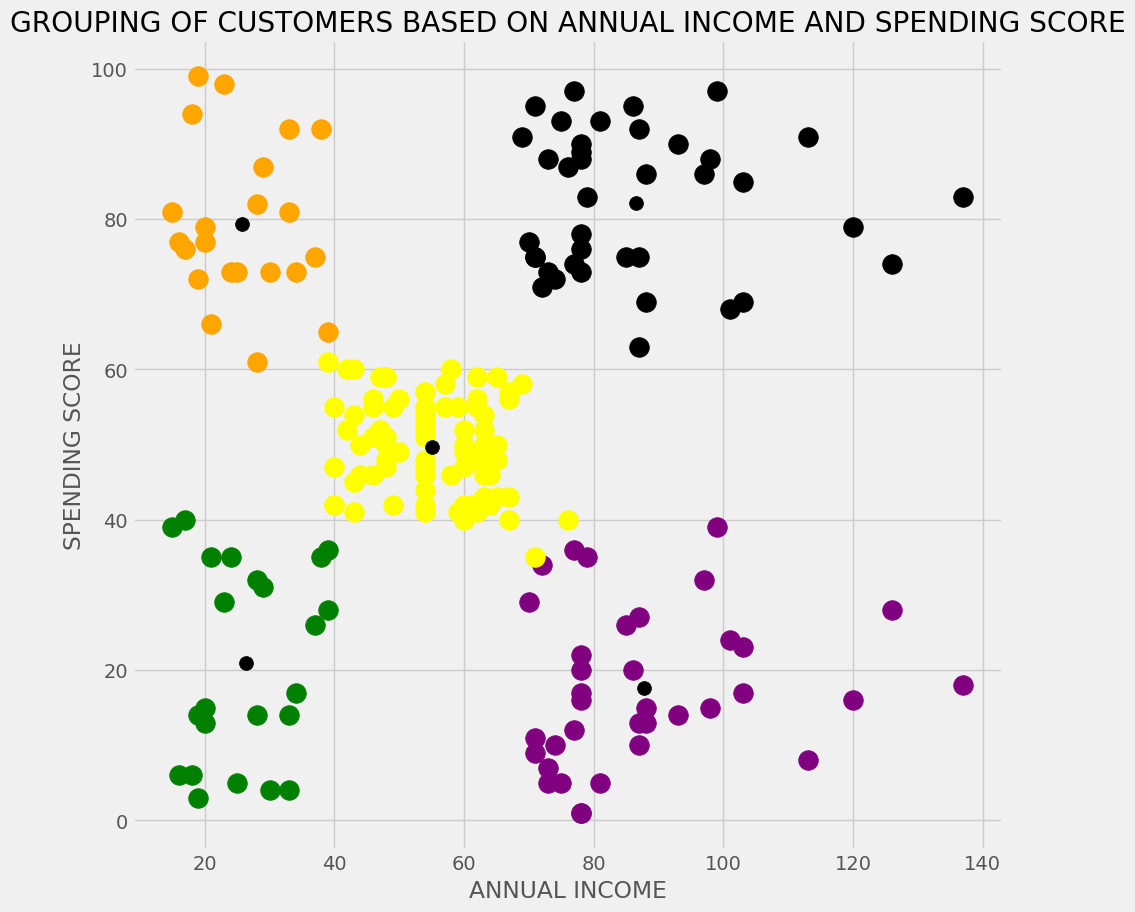

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],c='purple',s=200,label='high income low spending')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],c='yellow',s=200)
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],c='black',s=200)
plt.scatter(x[ymeans==3,0],x[ymeans==3,1],c='green',s=200)
plt.scatter(x[ymeans==4,0],x[ymeans==4,1],c='orange',s=200)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='Moderate Earners and spenders')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.show()

